# Relative Strength Index

https://www.investopedia.com/terms/r/rsi.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['RIVN', 'LCID', 'GM', 'F', 'HMC', 'TSLA']
start = '2021-12-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-01 00:00:00-05:00,19.160006,57.927746,27.730000,51.139999,115.690002,365.000000
2021-12-02 00:00:00-05:00,19.443785,60.881001,28.410000,48.410000,110.769997,361.533325
2021-12-03 00:00:00-05:00,18.729445,59.573986,28.219999,47.270000,104.669998,338.323334
2021-12-06 00:00:00-05:00,18.807726,59.703690,28.330000,44.860001,116.779999,336.336670
2021-12-07 00:00:00-05:00,19.531853,61.389839,28.889999,43.880001,116.180000,350.583344


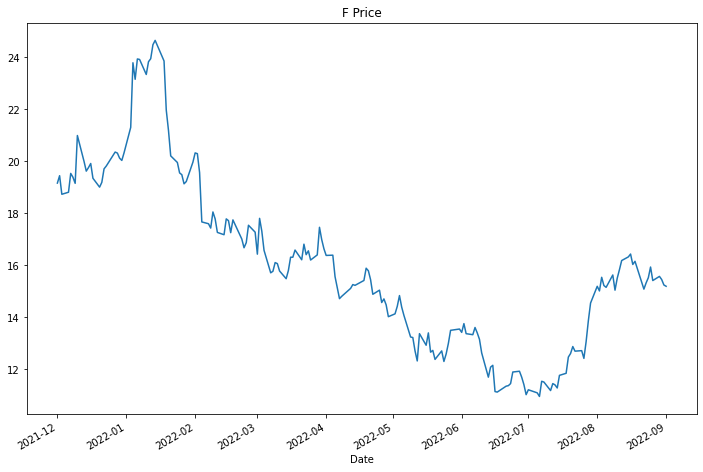

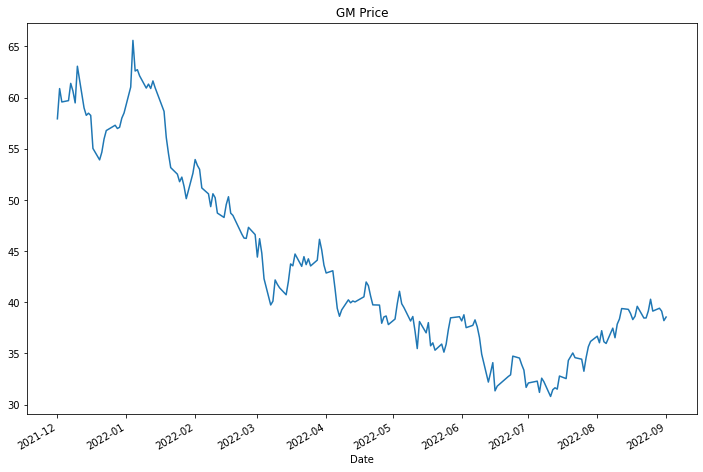

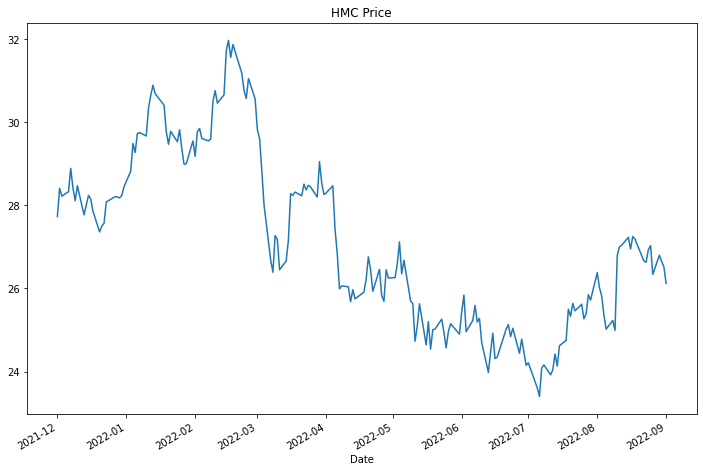

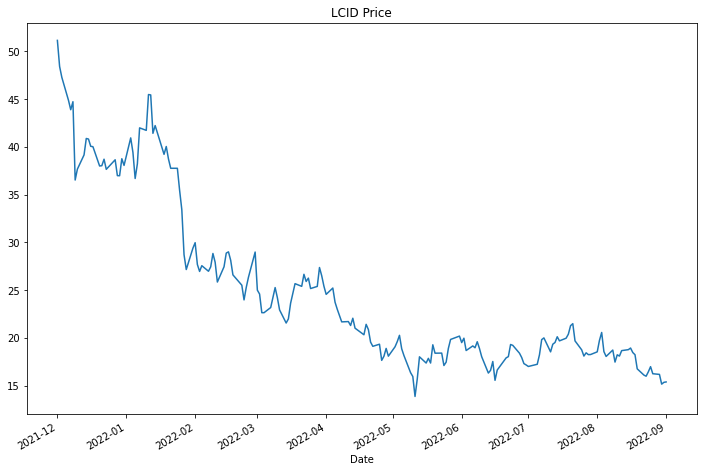

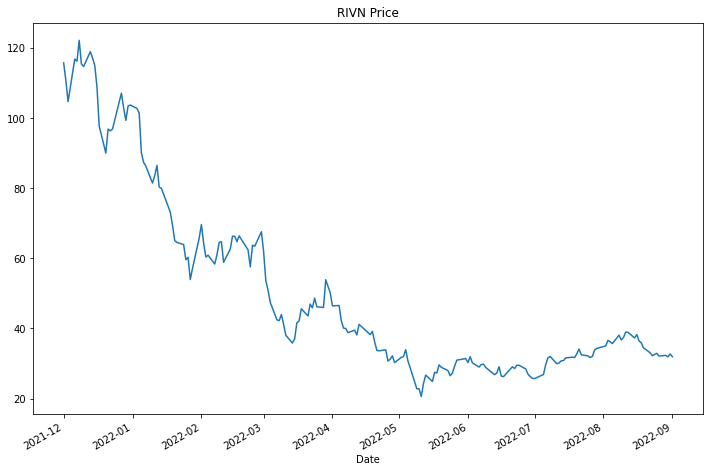

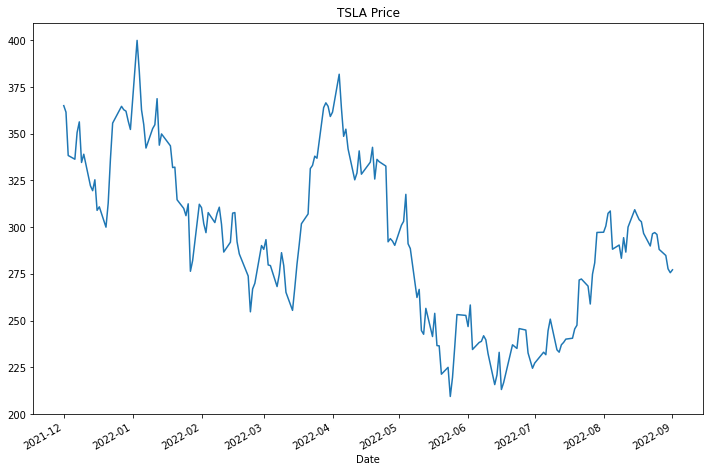

In [3]:
for s in df.columns:
    df[s].plot(figsize=(12,8))
    plt.title(s + " Price")
    plt.show()

In [4]:
# Simple way to do RSI
import talib as ta

for s in df.columns:
    df[s + '_RSI'] = ta.RSI(df[s], timeperiod=14)

In [5]:
df.tail()

,F,GM,HMC,LCID,RIVN,TSLA,F_RSI,GM_RSI,HMC_RSI,LCID_RSI,RIVN_RSI,TSLA_RSI
Date,,,,,,,,,,,,
2022-08-26 00:00:00-04:00,15.41,39.140636,26.340000,16.24,32.110001,288.089996,55.212809,58.170141,51.096385,39.627038,41.493578,50.647845
2022-08-29 00:00:00-04:00,15.57,39.419998,26.799999,16.17,32.310001,284.820007,56.719273,59.298342,55.958720,39.280838,42.439047,48.643403
2022-08-30 00:00:00-04:00,15.45,39.130001,26.650000,15.15,31.889999,277.700012,55.219104,57.562729,54.070796,34.544886,40.942726,44.512607
2022-08-31 00:00:00-04:00,15.24,38.209999,26.520000,15.34,32.709999,275.609985,52.597324,52.329862,52.420164,36.090605,45.018611,43.348898
2022-09-01 00:00:00-04:00,15.19,38.560001,26.120001,15.38,31.950001,277.160004,51.964690,54.041572,47.604671,36.430952,42.117310,44.507582


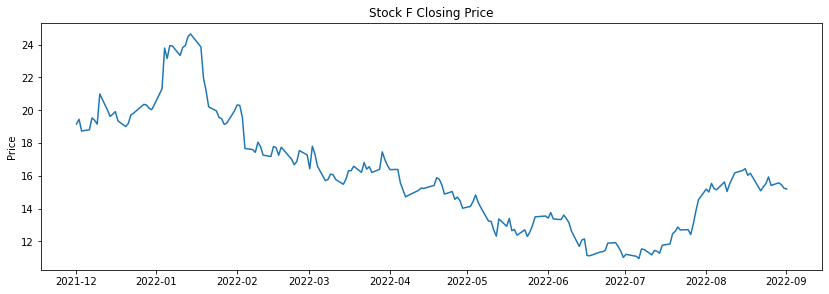

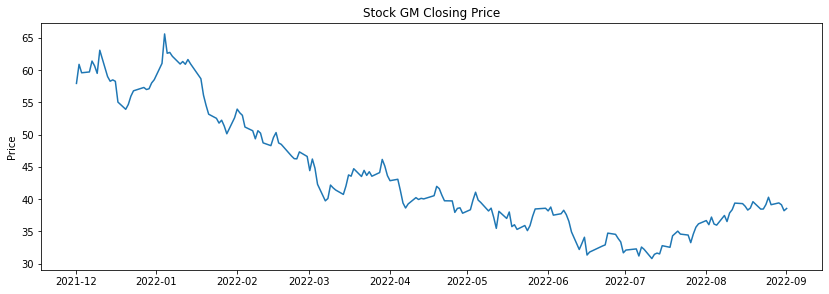

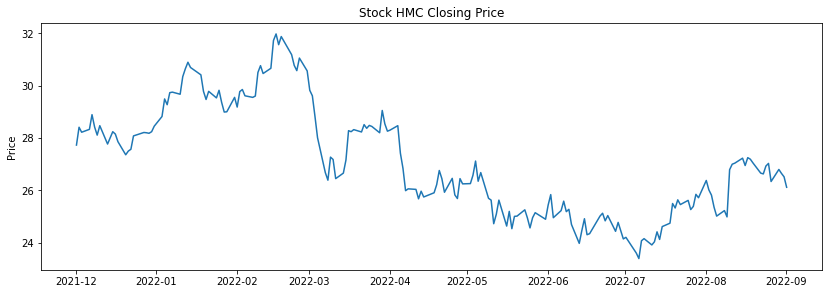

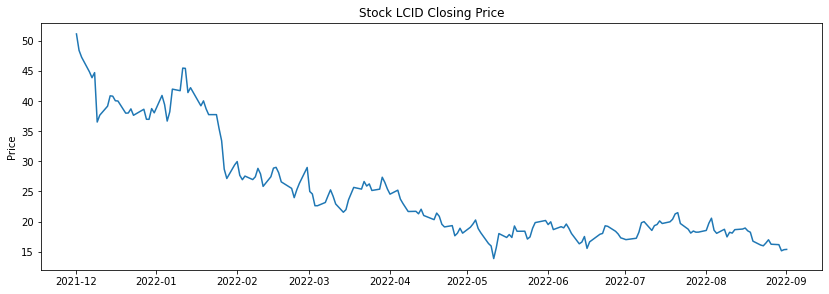

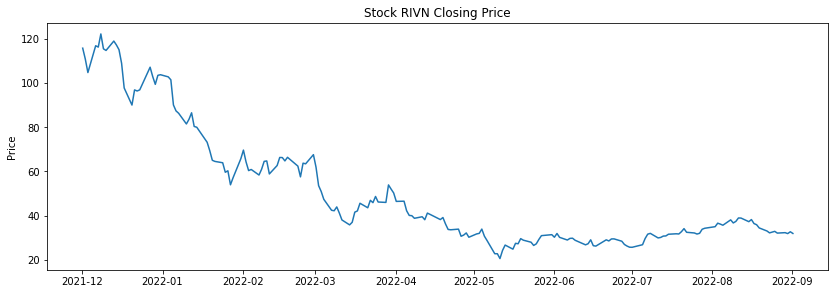

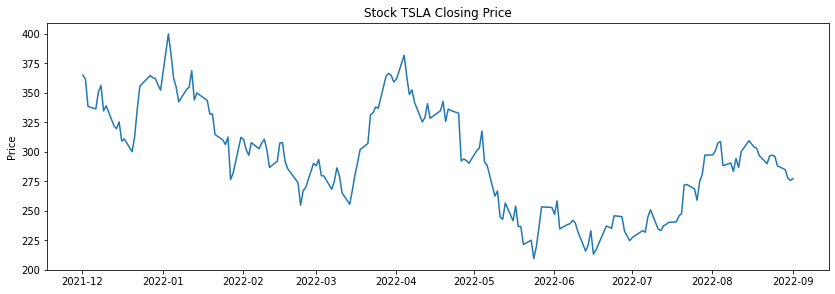

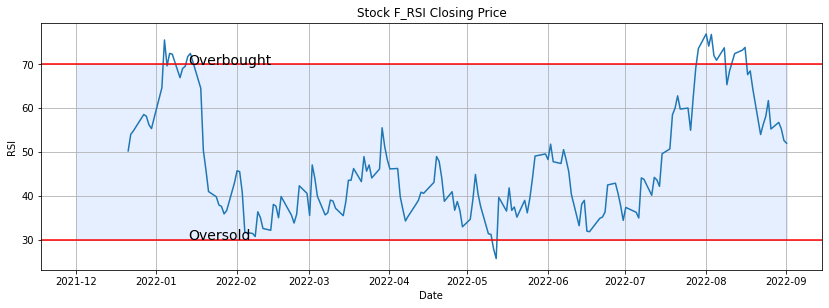

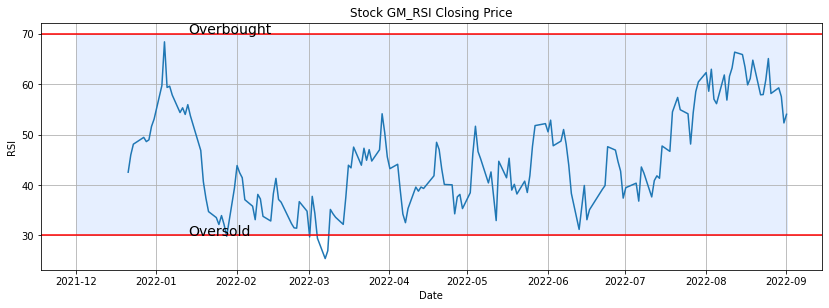

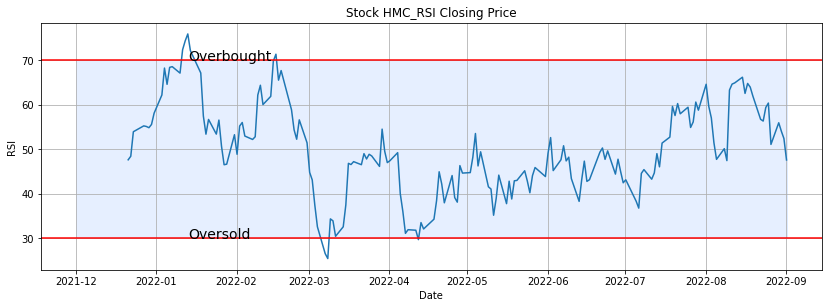

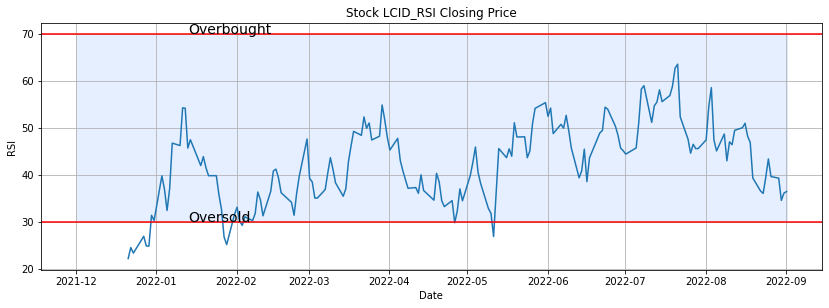

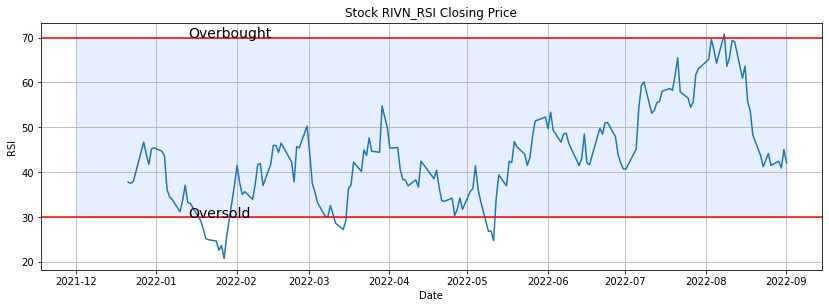

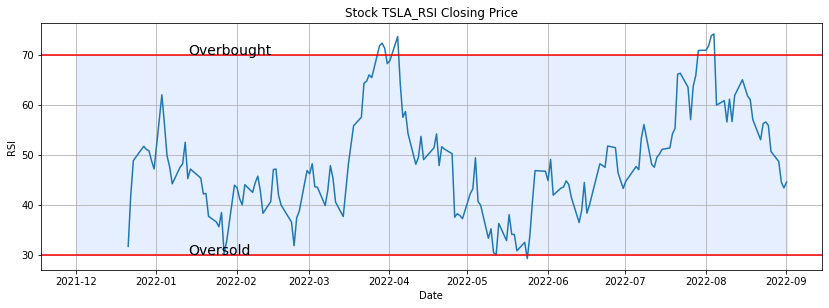

In [6]:
for s in df.columns[0:6]:
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(df[s])
    ax1.set_title('Stock '+ s +' Closing Price')
    ax1.set_ylabel('Price')
for i in df.columns[6:12]:
    fig = plt.figure(figsize=(14,10))
    ax2 = plt.subplot(2, 1, 2)    
    ax2.plot(df[i], label='Relative Strengths Index')
    ax2.set_title('Stock '+ i +' Closing Price')
    ax2.text(s='Overbought', x=df.index[30], y=70, fontsize=14)
    ax2.text(s='Oversold', x=df.index[30], y=30, fontsize=14)
    ax2.fill_between(df.index, y1=30, y2=70, color='#adccff', alpha=0.30)
    ax2.axhline(y=70, color='red')
    ax2.axhline(y=30, color='red')
    ax2.grid()
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')


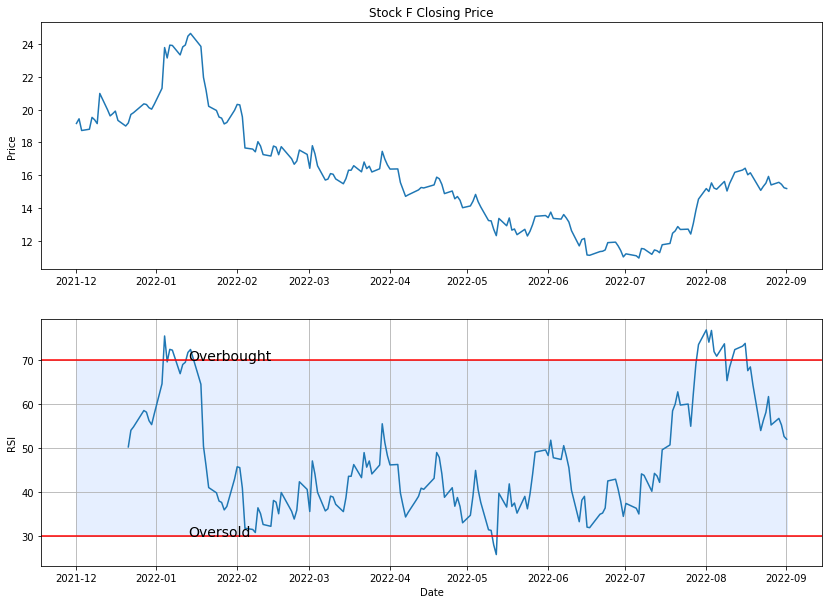

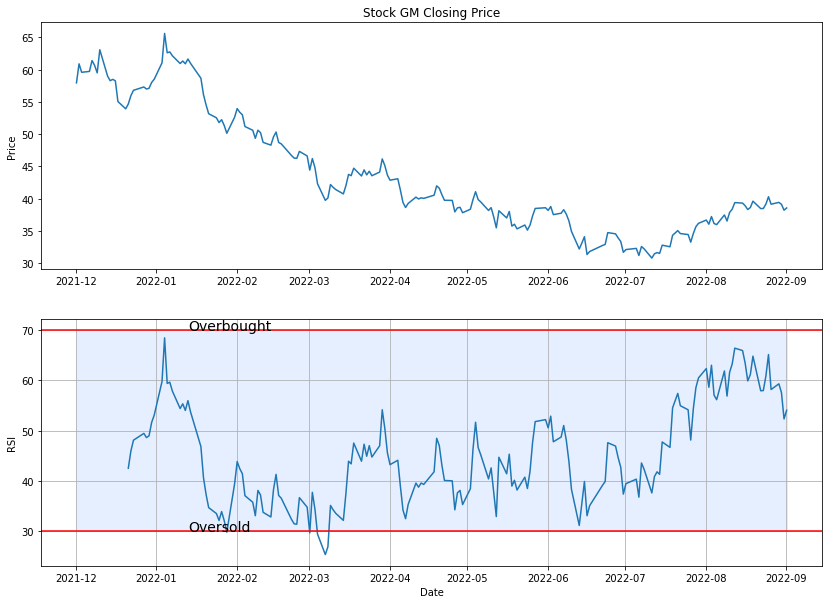

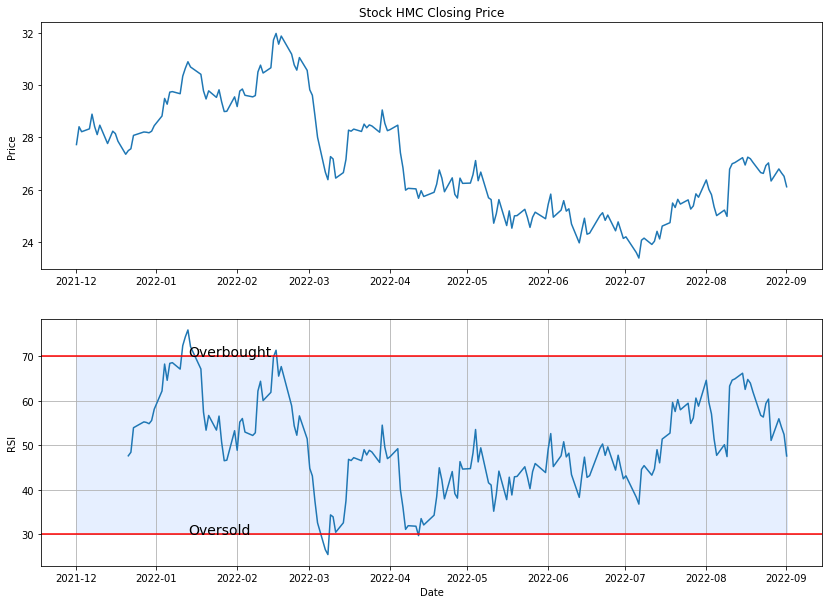

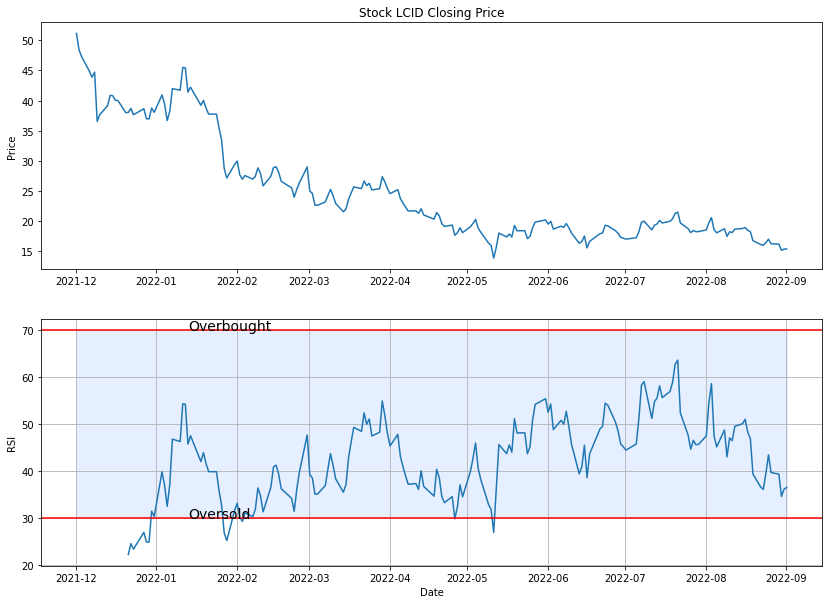

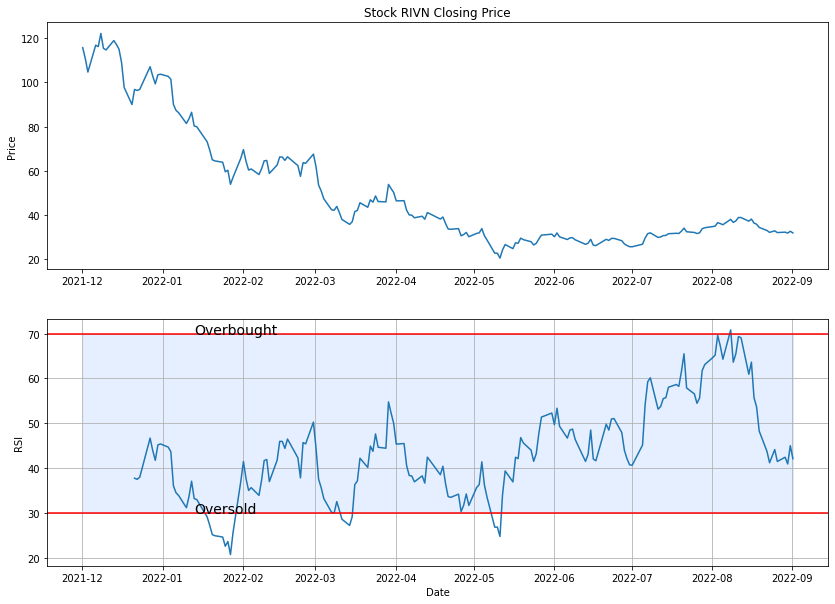

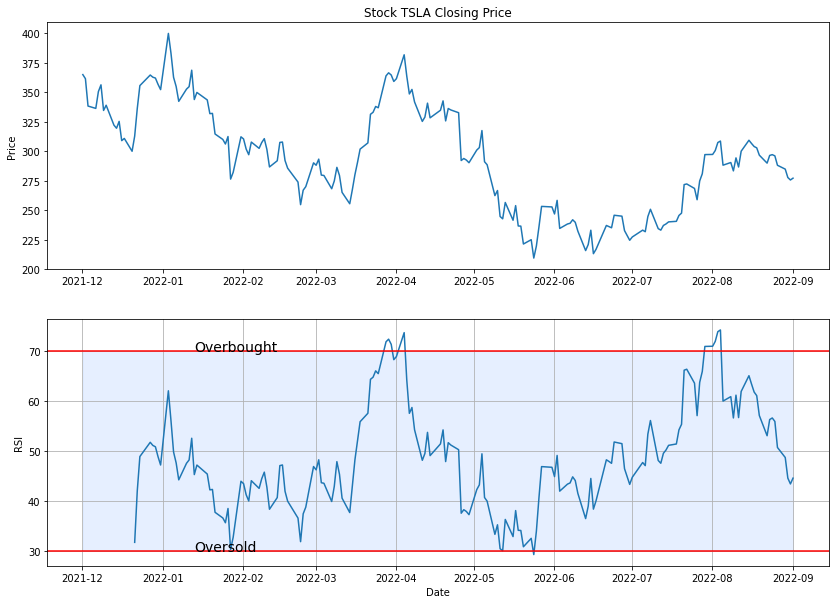

In [7]:
for s, i in zip(df.columns[0:6],  df.columns[6:12]):
    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(df[s])
    ax1.set_title('Stock '+ s +' Closing Price')
    ax1.set_ylabel('Price')
    
    ax2 = plt.subplot(2, 1, 2)    
    ax2.plot(df[i], label='Relative Strengths Index')
    ax2.text(s='Overbought', x=df.index[30], y=70, fontsize=14)
    ax2.text(s='Oversold', x=df.index[30], y=30, fontsize=14)
    ax2.fill_between(df.index, y1=30, y2=70, color='#adccff', alpha=0.30)
    ax2.axhline(y=70, color='red')
    ax2.axhline(y=30, color='red')
    ax2.grid()
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')